# 5.0 Data Visualization

### Requirements and Setup

In [11]:
import os
import cv2
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px
from matplotlib import pyplot as plt

timestamp = "2024-01-29 13:13:31.837354"
data = pd.read_csv('data/pose_data.csv')

## 5.3 Timeline Visualization

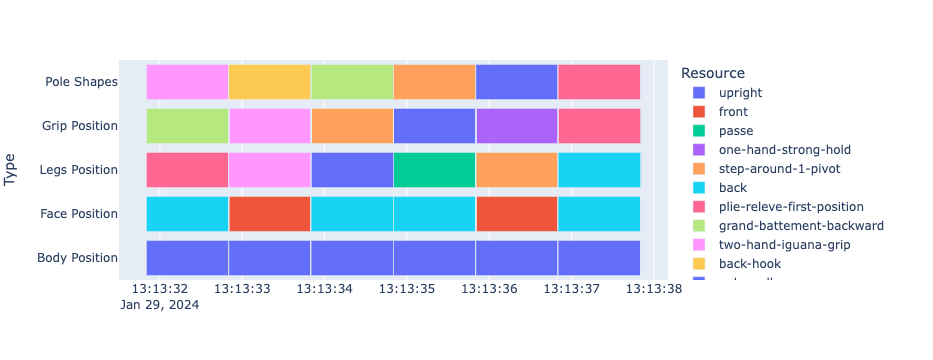

In [1]:
def calculate_time(row, upload_timestamp):
    start_time = upload_timestamp + timedelta(seconds=row['secs'] - 0.2)
    finish_time = upload_timestamp + timedelta(seconds=row['secs'])
    return pd.Series([start_time, finish_time])

def plotly_visualize_timeline(data, timestamp_str):
    upload_timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S.%f")
    data['secs'] = data['secs'].astype(float)
    combined = data.copy()
    combined[['Start', 'Finish']] = combined.apply(lambda row: calculate_time(row, upload_timestamp), axis=1)

    plot_data = []
    for i in range(len(combined) - 1):
        plot_data.append({
            'Category': 'Body Position',
            'Start': combined.iloc[i]['Finish'],
            'Finish': combined.iloc[i + 1]['Finish'],
            'Resource': combined.iloc[i]['pos_body']
        })
        plot_data.append({
            'Category': 'Face Position',
            'Start': combined.iloc[i]['Finish'],
            'Finish': combined.iloc[i + 1]['Finish'],
            'Resource': combined.iloc[i]['pos_face']
        })
        plot_data.append({
            'Category': 'Legs Position',
            'Start': combined.iloc[i]['Finish'],
            'Finish': combined.iloc[i + 1]['Finish'],
            'Resource': combined.iloc[i]['pos_legs']
        })
        plot_data.append({
            'Category': 'Grip Position',
            'Start': combined.iloc[i]['Finish'],
            'Finish': combined.iloc[i + 1]['Finish'],
            'Resource': combined.iloc[i]['pos_grip']  # Assuming you have a column 'pos_trick' in your DataFrame
        })
        plot_data.append({
            'Category': 'Pole Shapes',
            'Start': combined.iloc[i]['Finish'],
            'Finish': combined.iloc[i + 1]['Finish'],
            'Resource': combined.iloc[i]['pos_trick']  # Assuming you have a column 'pos_trick' in your DataFrame
        })
    plot_df = pd.DataFrame(plot_data)
    fig_timeline = px.timeline(plot_df, x_start="Start", x_end="Finish", y="Category", color="Resource", labels={'Category': 'Type'})
    fig_timeline.show()


plotly_visualize_timeline(data, timestamp)

In [12]:
def calculate_time(second, upload_timestamp):
    time = upload_timestamp + timedelta(seconds=second)
    return time.strftime("%H:%M:%S")

def visualize_video_frames(annotated_image_path_dir, data):
    total_frames = len(data)
    plt.rcParams.update({'font.size': 10})
    plt.rcParams['figure.constrained_layout.use'] = True

    image_files = sorted([f for f in os.listdir(annotated_image_path_dir) if f.endswith('.png')])
    
    fig, axs = plt.subplots(1, total_frames, figsize=(total_frames*2, 2))  # Assuming 3 inch width per image
    if total_frames == 1:
        axs = [axs]
    
    for i, image_file in enumerate(image_files[:total_frames]):        
        img = cv2.imread(os.path.join(annotated_image_path_dir, image_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axs[i].imshow(img)
        axs[i].set_title(f"{i}")
        axs[i].axis('off')
        i+=1
    
    for j in range(len(image_files), total_frames):
        axs[j].axis('off')

    plt.tight_layout()
    plt.savefig('timeline.png', dpi=150)  
    plt.show()


/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_23193/2750829565.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


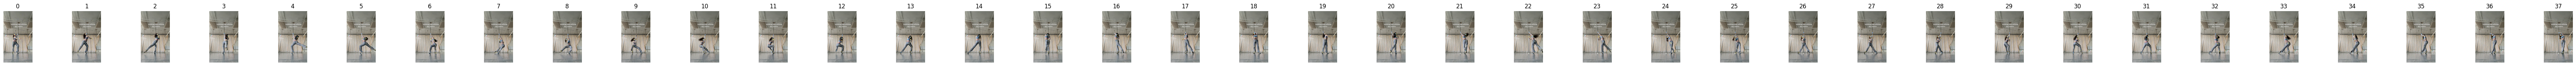

In [13]:
data = pd.read_csv('data/pose_data.csv')
annotated_image_path_dir = 'data/ground_truth/processed/upright/annotated/'
visualize_video_frames(annotated_image_path_dir, data)


/var/folders/8q/psx_9spx6sn4p06701_g30nh0000gn/T/ipykernel_11270/3423530949.py:31: UserWarning:

The figure layout has changed to tight



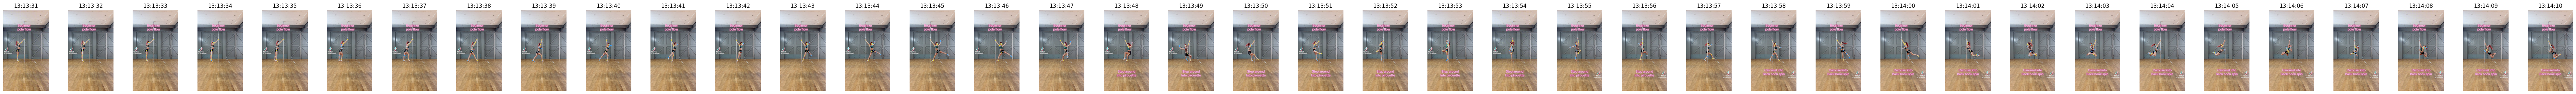

In [42]:
data = pd.read_csv('data/ground_truth/processed/combined/pose_data.csv')
annotated_image_path_dir = 'data/ground_truth/processed/combined/annotated/'

visualize_video_frames_by_second(annotated_image_path_dir, data, timestamp)